## Categorical Features

In [1]:
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]

In [2]:
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3}; # This mapping is natural but ambiguous

### One-hot encoding

In [3]:
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse = False, dtype = int)
vec.fit_transform(data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]], dtype=int32)

In [4]:
vec.get_feature_names()

['neighborhood=Fremont',
 'neighborhood=Queen Anne',
 'neighborhood=Wallingford',
 'price',
 'rooms']

In [5]:
DictVectorizer

sklearn.feature_extraction.dict_vectorizer.DictVectorizer

## Text Features

In [6]:
sample = ['problem of evil',
          'evil queen',
          'horizon problem']

Word Count

In [7]:
from sklearn.feature_extraction.text import CountVectorizer
vec= CountVectorizer()
TfidfVectorizer?

Object `TfidfVectorizer` not found.


In [8]:
X= vec.fit_transform(sample)
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [9]:
import pandas as pd
pd.DataFrame(X.toarray(),columns = vec.get_feature_names())


,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


## image Features
http://scikit-image.org/

https://jakevdp.github.io/PythonDataScienceHandbook/05.14-image-features.html

线性回归可以拟合多个参数（feature），所以我们可以首先x的不同的幂，然后利用线性回归进行拟合。

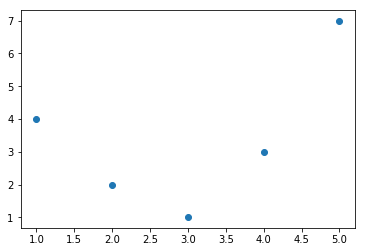

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

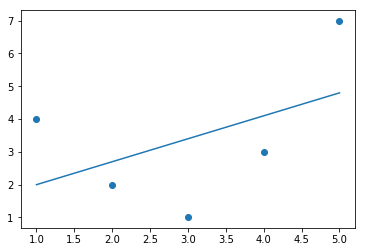

In [14]:
from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression()
yfit = model.fit(X,y).predict(X)
plt.scatter(x,y)
plt.plot(X,yfit)

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures?

In [ ]:
poly = PolynomialFeatures

In [16]:
poly = PolynomialFeatures(degree = 3, include_bias = False)
X2 = poly.fit_transform(X)
print(X2)

[[   1.    1.    1.]
 [   2.    4.    8.]
 [   3.    9.   27.]
 [   4.   16.   64.]
 [   5.   25.  125.]]


In [31]:
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
model.coef_

array([-3.76190476,  0.32142857,  0.08333333])

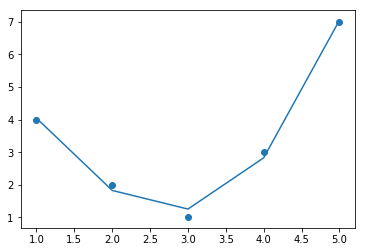

In [24]:
plt.scatter(x,y)
plt.plot(x, yfit)

https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html
https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html

In [32]:
from numpy import nan
X = np.array([[ nan, 0,   3  ],
              [ 3,   7,   9  ],
              [ 3,   5,   2  ],
              [ 4,   nan, 6  ],
              [ 8,   8,   1  ]])
y = np.array([14, 16, -1,  8, -5])

In [36]:
from sklearn.preprocessing import Imputer
imp = Imputer(strategy = 'mean')
X2 = imp.fit_transform(X)
X2

array([[ 4.5,  0. ,  3. ],
       [ 3. ,  7. ,  9. ],
       [ 3. ,  5. ,  2. ],
       [ 4. ,  5. ,  6. ],
       [ 8. ,  8. ,  1. ]])

In [37]:
model = LinearRegression().fit(X2, y)
model.predict(X2)

array([ 13.14869292,  14.3784627 ,  -1.15539732,  10.96606197,  -5.33782027])

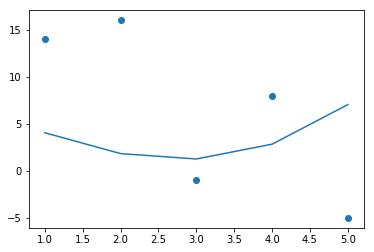

In [38]:
plt.scatter(x,y)
plt.plot(x, yfit)